In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import matplotlib
from sklearn.model_selection import train_test_split


In [2]:
def plot_boundary(clf, X, y,threshold=100):
    """
    Function to plot a boundary decision
    """
    h = 0.002
    x_min, x_max = X.iloc[:, 0].min() - .1, X.iloc[:, 0].max() + .1
    y_min, y_max = X.iloc[:, 1].min() - .1, X.iloc[:, 1].max() + .1
    h1 = (X.iloc[:, 0].max() - X.iloc[:, 0].min())/80
    h2 = (X.iloc[:, 1].max() - X.iloc[:, 1].min())/90
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h1),
                         np.arange(y_min, y_max, h2))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    if threshold==100:
      plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    else:
      plt.contourf(xx, yy, Z<threshold, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s = 100)
    #plt.title('score : ' + str(clf.score(X,y)))
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

# Exercise 1: Impact of activation fuction and iterations of gradient descent

In [3]:
dataset = pd.read_csv('exo1_keras.csv')
dataset

x1   x2  y
0    1.5  4.0  1
1    1.0  2.0  1
2    0.0  0.0  1
3    1.0  4.0  1
4    0.5  3.0  1
..   ...  ... ..
145 -2.8 -3.3  0
146 -2.8  1.0  0
147 -2.8  3.0  0
148 -2.4  3.0  0
149 -2.3  5.0  0

[150 rows x 3 columns]

In [4]:
X = dataset.iloc[:,0:2] # X contains the features
label = dataset.y # the labels

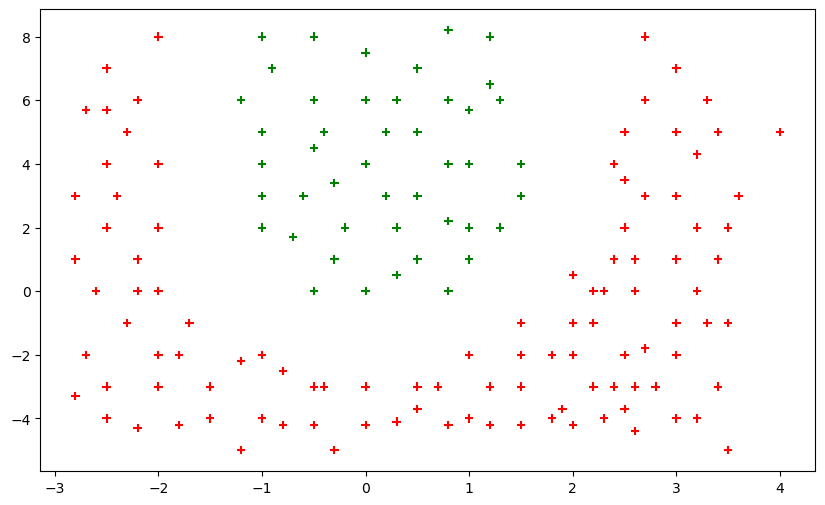

In [5]:
color_map = matplotlib.colors.ListedColormap(pd.Series(['red', 'green']))
fig = plt.figure(figsize=  (10,6))
fig = plt.scatter(X.iloc[:,0], X.iloc[:,1], c = label, cmap = color_map, marker='+')

In [6]:
model = tf.keras.models.Sequential([ # sequential model is the main kind of models for neural networks
  tf.keras.layers.Input(shape=(2,)), # input layer of size 2
  tf.keras.layers.Dense(10), # hidden layer of size 10
  tf.keras.layers.Dense(1), # output layer of size 1
  tf.keras.layers.Activation('sigmoid'), # with sigmoid activation
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
from keras.utils import plot_model
# fonction plot_model : on donne un modèle, le nom du fichier de sauvegarde, et deux booleens qui disent qu'on regarde les tailles et les noms des layers
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
history=model.fit(X, label, batch_size=10, epochs=100)
# we save the iterations in a variable history
# you can see the evolution of the loss and accuracy for the different iterations

Epoch 1/100


C:\Users\souma\anaconda3\Lib\site-packages\keras\src\backend.py:5820: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


15/15 [==============================] - 1s 4ms/step - loss: 3.7897 - accuracy: 0.2733
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 3.4940 - accuracy: 0.2733
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 3.1888 - accuracy: 0.2733
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 2.9194 - accuracy: 0.2733
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 2.6477 - accuracy: 0.2800
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 2.3993 - accuracy: 0.2867
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - loss: 2.1549 - accuracy: 0.2867
Epoch 8/100
15/15 [==============================] - 0s 3ms/step - loss: 1.9316 - accuracy: 0.3000
Epoch 9/100
15/15 [==============================] - 0s 3ms/step - loss: 1.7187 - accuracy: 0.3000
Epoch 10/100
15/15 [==============================] - 0s 2ms/step - loss: 1.5290 - accuracy: 0.3067
Epoch 11/100
15/15 [=

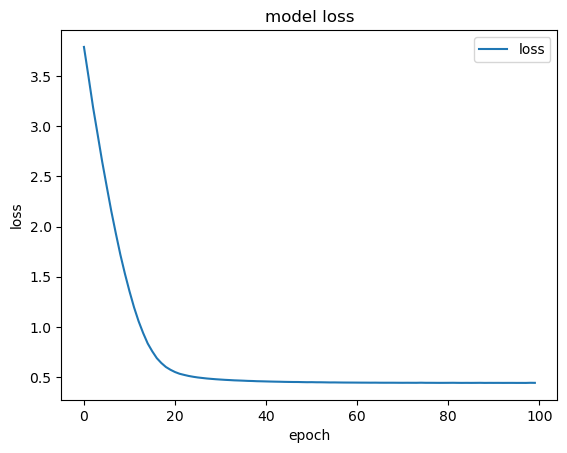

In [11]:
# We can plot the evolution of the loss with the following commands:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper right')
plt.show()
# as you can see, the loss is decreasing with the number of iterations (as expected)

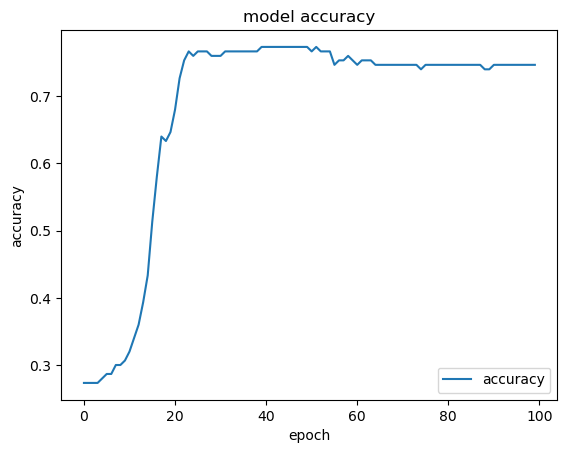

In [12]:
# we can also plot the evolution of the accuracy.
# here it decreases with the number of iterations (which is not usual)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'], loc='lower right')
plt.show()

In [15]:
history.history['loss'][-1]

0.44216060638427734

In [16]:
history.history['accuracy'][-1]

0.746666669845581

239/239 [==============================] - 0s 2ms/step


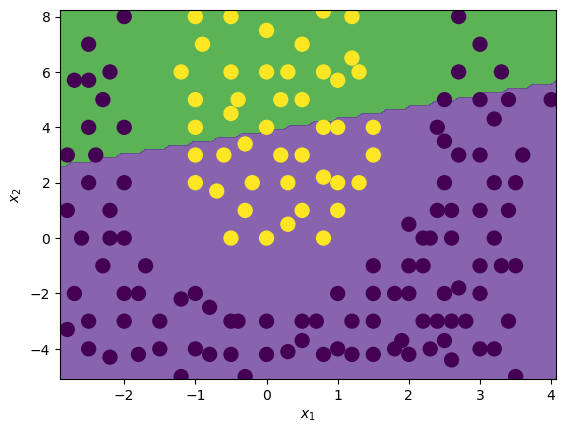

In [13]:
plot_boundary(model, X, label,0.5)

In [14]:
model = tf.keras.models.Sequential([ # sequential model is the main kind of models for neural networks
  tf.keras.layers.Input(shape=(2,)), # input layer of size 2
  tf.keras.layers.Dense(10), # hidden layer of size 10
  tf.keras.layers.Activation('relu'), # relu activation function 
  tf.keras.layers.Dense(1), # output layer of size 1
  tf.keras.layers.Activation('sigmoid'), # with sigmoid activation
])

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
hist = model.fit(X, label, epochs=100)

Epoch 1/100


C:\Users\souma\anaconda3\Lib\site-packages\keras\src\backend.py:5820: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


5/5 [==============================] - 1s 6ms/step - loss: 0.5957 - accuracy: 0.7800
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5858 - accuracy: 0.7800
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5761 - accuracy: 0.7667
Epoch 4/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5671 - accuracy: 0.7733
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5584 - accuracy: 0.7867
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5505 - accuracy: 0.7800
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5421 - accuracy: 0.7867
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5352 - accuracy: 0.7800
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5278 - accuracy: 0.7800
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5210 - accuracy: 0.7800
Epoch 11/100
5/5 [=======================

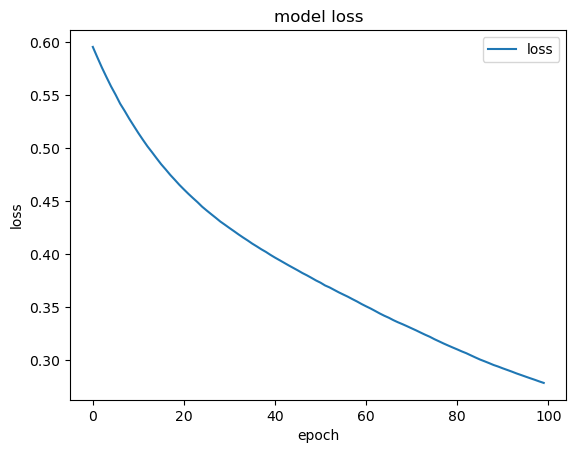

In [17]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper right')
plt.show()

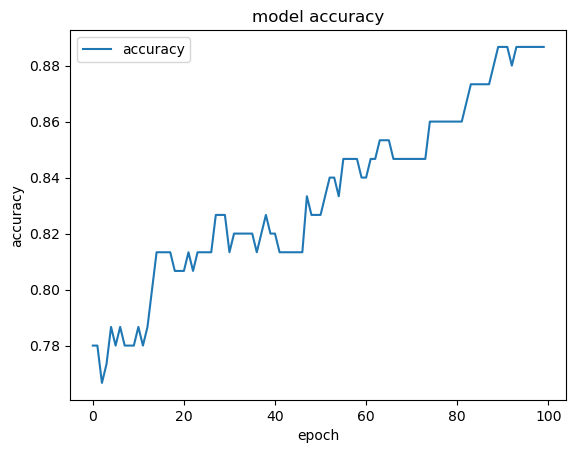

In [18]:
plt.plot(hist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()

Yes It's better than before

239/239 [==============================] - 0s 2ms/step


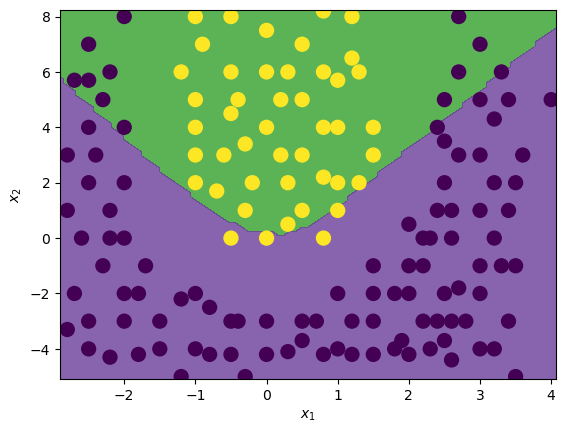

In [19]:
plot_boundary(model, X, label, 0.4)

In [20]:
_hist = model.fit(X, label, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 5ms/step - loss: 0.2770 - accuracy: 0.8867
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 0.2755 - accuracy: 0.8867
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.2744 - accuracy: 0.8867
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.2730 - accuracy: 0.8867
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.2717 - accuracy: 0.8933
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 0.2706 - accuracy: 0.8933
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.2692 - accuracy: 0.8933
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.2679 - accuracy: 0.8933
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.2668 - accuracy: 0.8933
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.2654 - accuracy: 0.8933
Epoch 11/100
5/5 [===========

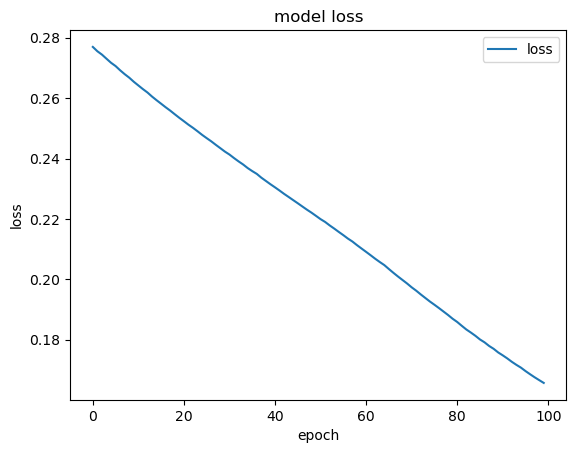

In [21]:
plt.plot(_hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper right')
plt.show()

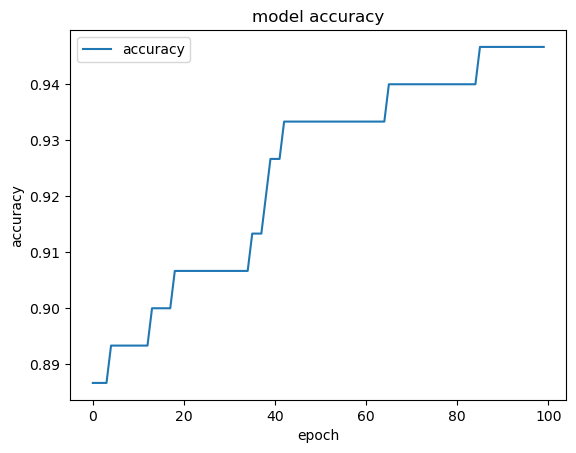

In [22]:
plt.plot(_hist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()

239/239 [==============================] - 0s 2ms/step


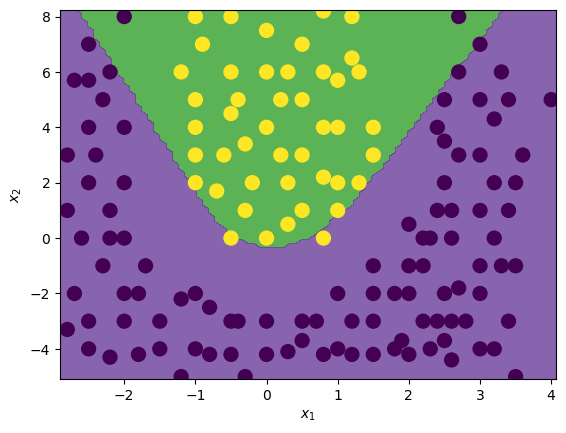

In [23]:
plot_boundary(model, X, label, 0.4)

In [24]:
hist_model = model.fit(X, label, epochs=50)

Epoch 1/50
5/5 [==============================] - 0s 3ms/step - loss: 0.1648 - accuracy: 0.9467
Epoch 2/50
5/5 [==============================] - 0s 3ms/step - loss: 0.1639 - accuracy: 0.9467
Epoch 3/50
5/5 [==============================] - 0s 4ms/step - loss: 0.1628 - accuracy: 0.9467
Epoch 4/50
5/5 [==============================] - 0s 4ms/step - loss: 0.1619 - accuracy: 0.9467
Epoch 5/50
5/5 [==============================] - 0s 4ms/step - loss: 0.1609 - accuracy: 0.9467
Epoch 6/50
5/5 [==============================] - 0s 5ms/step - loss: 0.1601 - accuracy: 0.9467
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9467
Epoch 8/50
5/5 [==============================] - 0s 4ms/step - loss: 0.1582 - accuracy: 0.9467
Epoch 9/50
5/5 [==============================] - 0s 4ms/step - loss: 0.1573 - accuracy: 0.9467
Epoch 10/50
5/5 [==============================] - 0s 641us/step - loss: 0.1565 - accuracy: 0.9467
Epoch 11/50
5/5 [====================

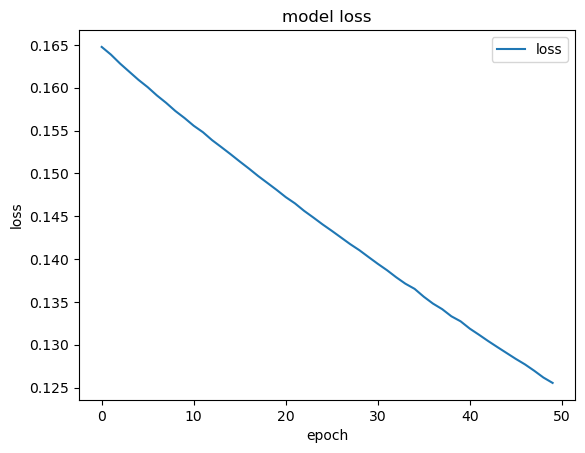

In [25]:
plt.plot(hist_model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper right')
plt.show()

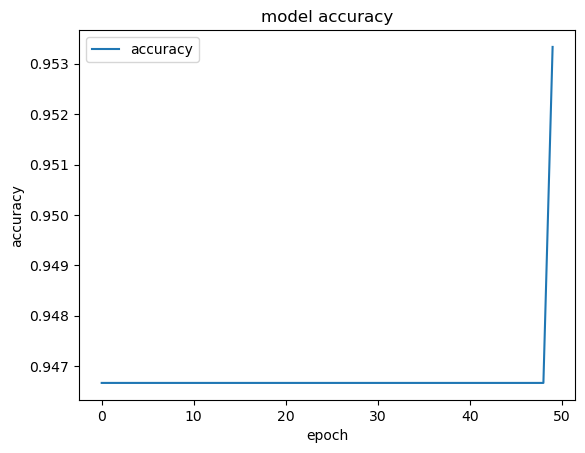

In [26]:
plt.plot(hist_model.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()

239/239 [==============================] - 1s 2ms/step


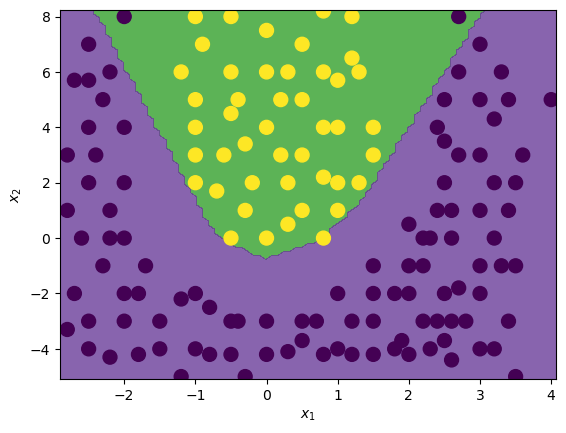

In [27]:
plot_boundary(model, X, label, 0.4)

# Exercise 2 : more hidden layers and more epochs...

In [28]:
dataset = pd.read_csv('exo1_keras_v3.csv')
dataset

x1   x2  y
0   -0.5 -2.2  1
1    0.0 -2.2  1
2    0.5 -2.2  1
3    1.5  4.0  1
4    1.0  2.0  1
..   ...  ... ..
148 -2.8 -3.3  0
149 -2.8  1.0  0
150 -2.8  3.0  0
151 -2.4  3.0  0
152 -2.3  5.0  0

[153 rows x 3 columns]

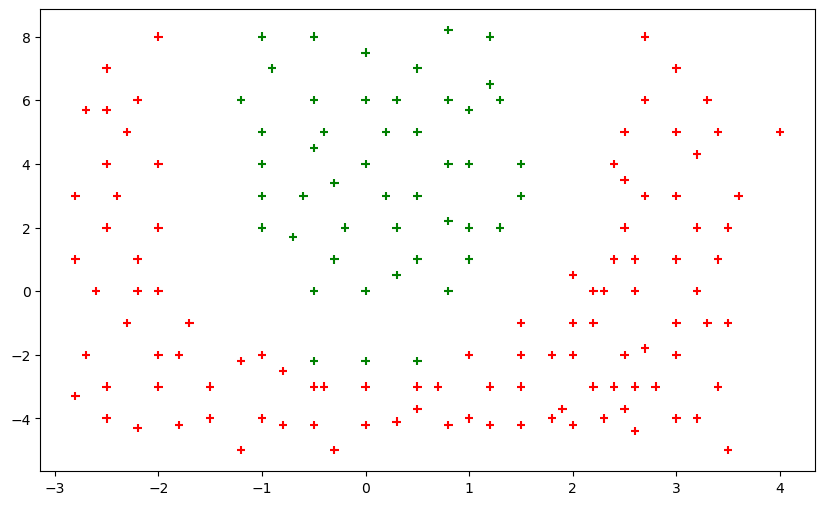

In [29]:
color_map = matplotlib.colors.ListedColormap(pd.Series(['red', 'green']))
fig = plt.figure(figsize=  (10,6))
fig = plt.scatter(dataset.iloc[:,0], dataset.iloc[:,1], c = dataset.y, cmap = color_map, marker='+')

In [30]:
X = dataset.iloc[:,:2]
label = dataset.y

In [31]:
model = tf.keras.models.Sequential([ # sequential model is the main kind of models for neural networks
  tf.keras.layers.Input(shape=(2,)), # input layer of size 2
  tf.keras.layers.Dense(20, activation='sigmoid'),
  tf.keras.layers.Dense(20, activation='relu'), # hidden layer of size 20
  tf.keras.layers.Dense(1), # output layer of size 1
  tf.keras.layers.Activation('sigmoid'), # with sigmoid activation
])

In [32]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
hist = model.fit(X, label, epochs=100)

Epoch 1/100


C:\Users\souma\anaconda3\Lib\site-packages\keras\src\backend.py:5820: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


5/5 [==============================] - 1s 5ms/step - loss: 0.6578 - accuracy: 0.6863
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6264 - accuracy: 0.6863
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6025 - accuracy: 0.6863
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5811 - accuracy: 0.6863
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5644 - accuracy: 0.6863
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5488 - accuracy: 0.6863
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5362 - accuracy: 0.6667
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5236 - accuracy: 0.7059
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5148 - accuracy: 0.7124
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5059 - accuracy: 0.7320
Epoch 11/100
5/5 [=======================

239/239 [==============================] - 0s 2ms/step


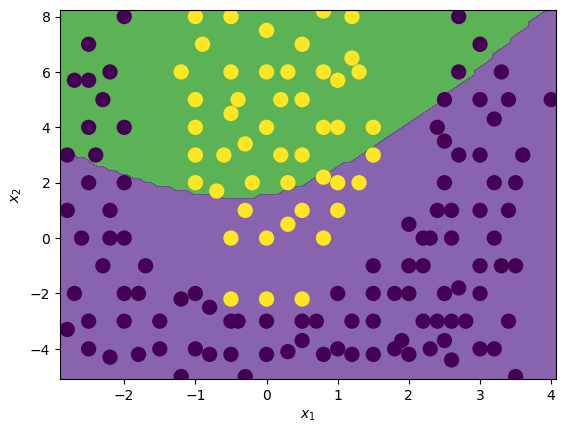

In [35]:
plot_boundary(model, X, label, 0.5)

In [36]:
hist_1 = model.fit(X, label, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 4ms/step - loss: 0.3801 - accuracy: 0.8301
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.3769 - accuracy: 0.8301
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.3749 - accuracy: 0.8301
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.3727 - accuracy: 0.8301
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.3712 - accuracy: 0.8301
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.3683 - accuracy: 0.8366
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.3662 - accuracy: 0.8431
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.3642 - accuracy: 0.8431
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3620 - accuracy: 0.8431
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.3594 - accuracy: 0.8431
Epoch 11/100
5/5 [===========

239/239 [==============================] - 0s 2ms/step


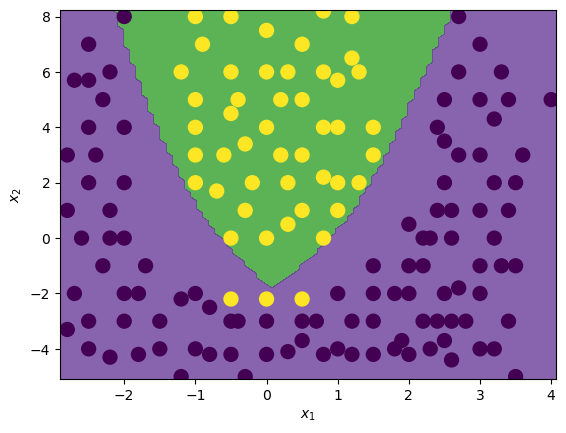

In [37]:
plot_boundary(model, X, label, 0.5)

In [38]:
hist_2 = model.fit(X, label, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1273 - accuracy: 0.9739
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1256 - accuracy: 0.9739
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 0.1244 - accuracy: 0.9739
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1229 - accuracy: 0.9739
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1209 - accuracy: 0.9739
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1196 - accuracy: 0.9739
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1177 - accuracy: 0.9739
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1159 - accuracy: 0.9739
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 0.1144 - accuracy: 0.9739
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1130 - accuracy: 0.9739
Epoch 11/100
5/5 [===========

239/239 [==============================] - 0s 2ms/step


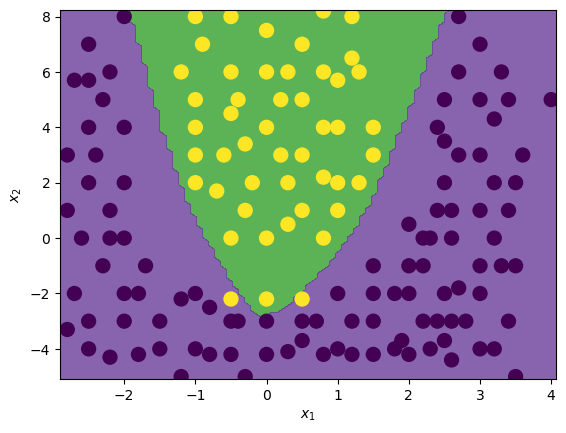

In [39]:
plot_boundary(model, X, label, 0.5)

In [40]:
hist_3 = model.fit(X, label, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0516 - accuracy: 0.9869
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0514 - accuracy: 0.9869
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 0.9869
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0509 - accuracy: 0.9869
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0504 - accuracy: 0.9869
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0502 - accuracy: 0.9869
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0498 - accuracy: 0.9869
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0496 - accuracy: 0.9869
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0501 - accuracy: 0.9869
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0492 - accuracy: 0.9869
Epoch 11/100
5/5 [===========

239/239 [==============================] - 0s 2ms/step


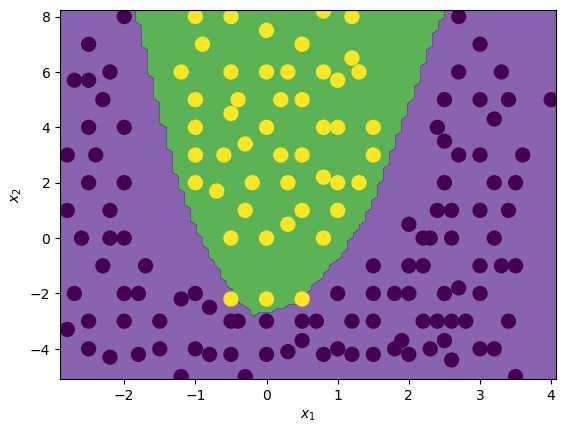

In [41]:
plot_boundary(model, X, label, 0.5)

# Exercice 3: neural networks in practice

In [42]:
dataset = pd.read_csv("exo3_keras_v2.csv")
dataset

X         Y  Classe
0   -0.697580  0.684940       0
1   -0.478690  0.633770       1
2    0.057028  0.918860       0
3   -0.593890  0.494880       0
4    0.229840 -0.411550       1
..        ...       ...     ...
113  0.460250  0.012427       1
114 -0.046659  0.816520       1
115  0.322000  0.692250       1
116 -0.524770  0.209800       1
117 -0.599650 -0.418860       0

[118 rows x 3 columns]

In [43]:
train, test = train_test_split(dataset, test_size=0.2, random_state=4)

In [44]:
X_train = train.iloc[:,:2]
label_train = train.Classe
X_test = test.iloc[:,:2]
label_test = test.Classe

In [45]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(2,)),
  tf.keras.layers.Dense(80,activation='relu'),# 1st hidden layer, 80 neurons, relu activation
  tf.keras.layers.Dense(40,activation='relu'),# 2nd hidden layer, 40 neurons, relu activation
  tf.keras.layers.Dense(30,activation='relu'),# 3rd hidden layer, 30 neurons, relu activation
  tf.keras.layers.Dense(1),
  tf.keras.layers.Activation('sigmoid'), # last layer
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 80)                240       
                                                                 
 dense_8 (Dense)             (None, 40)                3240      
                                                                 
 dense_9 (Dense)             (None, 30)                1230      
                                                                 
 dense_10 (Dense)            (None, 1)                 31        
                                                                 
 activation_4 (Activation)   (None, 1)                 0         
                                                                 
Total params: 4741 (18.52 KB)
Trainable params: 4741 (18.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
# we now compile the model as before
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [47]:
history=model.fit(X_train, label_train, validation_split = 0.2, batch_size=100, epochs=500)

Epoch 1/500


C:\Users\souma\anaconda3\Lib\site-packages\keras\src\backend.py:5820: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1/1 [==============================] - 1s 1s/step - loss: 0.6903 - accuracy: 0.5867 - val_loss: 0.6896 - val_accuracy: 0.6842
Epoch 2/500
1/1 [==============================] - ETA: 0s - loss: 0.6883 - accuracy: 0.6000

C:\Users\souma\anaconda3\Lib\site-packages\keras\src\backend.py:5820: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1/1 [==============================] - 0s 56ms/step - loss: 0.6883 - accuracy: 0.6000 - val_loss: 0.6896 - val_accuracy: 0.6842
Epoch 3/500
1/1 [==============================] - 0s 49ms/step - loss: 0.6864 - accuracy: 0.5733 - val_loss: 0.6900 - val_accuracy: 0.6316
Epoch 4/500
1/1 [==============================] - 0s 46ms/step - loss: 0.6845 - accuracy: 0.5867 - val_loss: 0.6902 - val_accuracy: 0.6316
Epoch 5/500
1/1 [==============================] - 0s 47ms/step - loss: 0.6827 - accuracy: 0.5733 - val_loss: 0.6903 - val_accuracy: 0.5789
Epoch 6/500
1/1 [==============================] - 0s 49ms/step - loss: 0.6811 - accuracy: 0.5733 - val_loss: 0.6903 - val_accuracy: 0.5789
Epoch 7/500
1/1 [==============================] - 0s 55ms/step - loss: 0.6795 - accuracy: 0.5733 - val_loss: 0.6903 - val_accuracy: 0.5789
Epoch 8/500
1/1 [==============================] - 0s 57ms/step - loss: 0.6780 - accuracy: 0.5733 - val_loss: 0.6903 - val_accuracy: 0.5789
Epoch 9/500
1/1 [===============

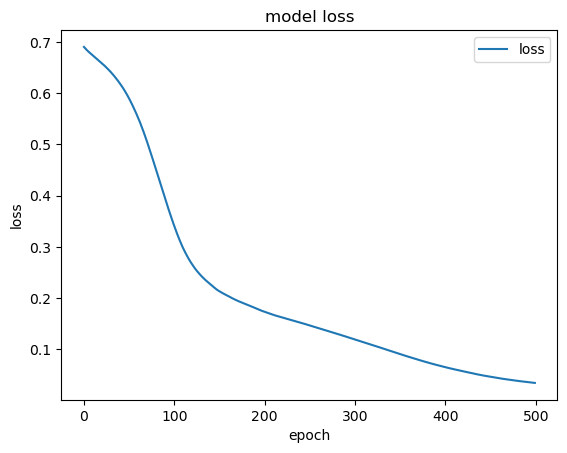

In [48]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper right')
plt.show()

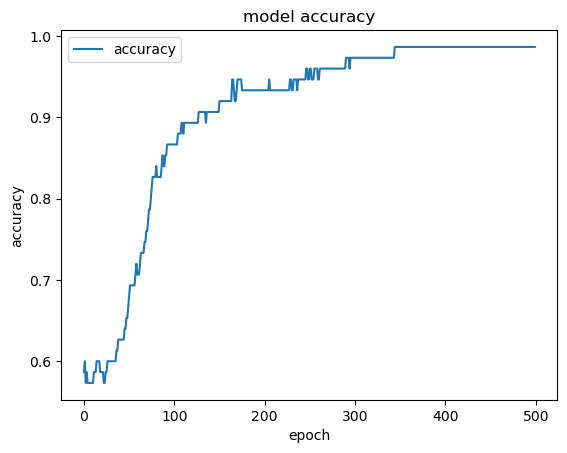

In [49]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()

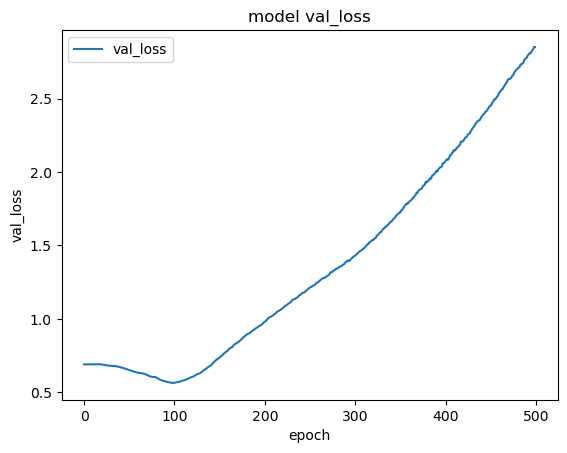

In [50]:
plt.plot(history.history['val_loss'])
plt.title('model val_loss')
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend(['val_loss'], loc='upper left')
plt.show()

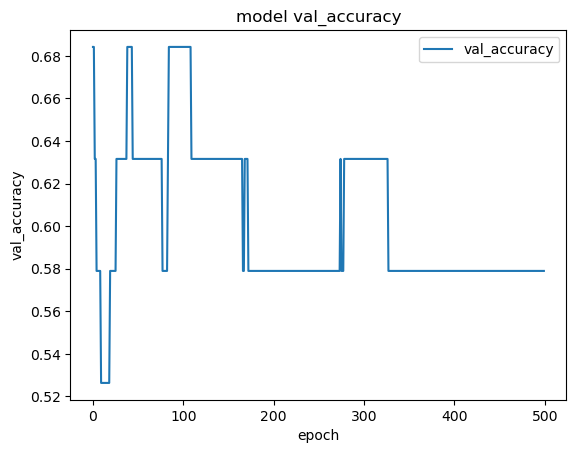

In [52]:
plt.plot(history.history['val_accuracy'])
plt.title('model val_accuracy')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['val_accuracy'], loc='upper right')
plt.show()

279/279 [==============================] - 1s 2ms/step


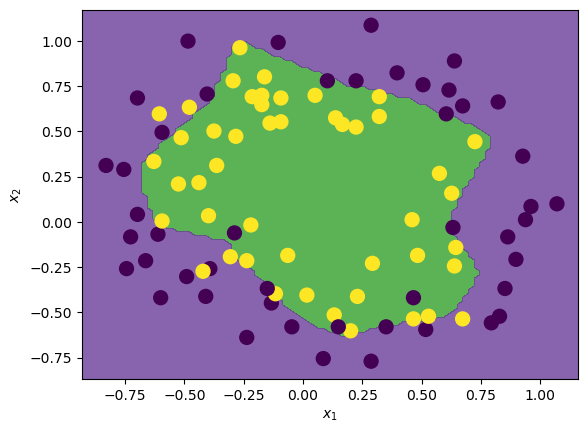

In [53]:
plot_boundary(model, X_train, label_train, 0.5)

In [54]:
model.evaluate(X_train, label_train)

3/3 [==============================] - 0s 4ms/step - loss: 0.6033 - accuracy: 0.9043


[0.6032527089118958, 0.9042553305625916]

In [55]:
# just defining the model as before
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(2,)),
  tf.keras.layers.Dense(80,activation='relu'),# 1st hidden layer, 80 neurons, relu activation
  tf.keras.layers.Dense(40,activation='relu'),# 2nd hidden layer, 40 neurons, relu activation
  tf.keras.layers.Dense(30,activation='relu'),# 3rd hidden layer, 30 neurons, relu activation
  tf.keras.layers.Dense(1),
  tf.keras.layers.Activation('sigmoid'), # last layer
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 80)                240       
                                                                 
 dense_12 (Dense)            (None, 40)                3240      
                                                                 
 dense_13 (Dense)            (None, 30)                1230      
                                                                 
 dense_14 (Dense)            (None, 1)                 31        
                                                                 
 activation_5 (Activation)   (None, 1)                 0         
                                                                 
Total params: 4741 (18.52 KB)
Trainable params: 4741 (18.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [57]:
my_callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)
# EarlyStopping is already implementing in keras. This is a "callback" structure
# Here, we monitor the "val_loss" and we stop the learning when this quantity
# has not improved since 100 iterations (because partience = 100 here, but you can change this value)
history=model.fit(X_train, label_train, validation_split = 0.2, batch_size=100, epochs=500,callbacks=my_callbacks)

Epoch 1/500


C:\Users\souma\anaconda3\Lib\site-packages\keras\src\backend.py:5820: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1/1 [==============================] - 2s 2s/step - loss: 0.6865 - accuracy: 0.5333 - val_loss: 0.6953 - val_accuracy: 0.3684
Epoch 2/500
1/1 [==============================] - 0s 50ms/step - loss: 0.6843 - accuracy: 0.5333 - val_loss: 0.6941 - val_accuracy: 0.3684
Epoch 3/500
1/1 [==============================] - ETA: 0s - loss: 0.6820 - accuracy: 0.5333

C:\Users\souma\anaconda3\Lib\site-packages\keras\src\backend.py:5820: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1/1 [==============================] - 0s 51ms/step - loss: 0.6820 - accuracy: 0.5333 - val_loss: 0.6930 - val_accuracy: 0.3684
Epoch 4/500
1/1 [==============================] - 0s 56ms/step - loss: 0.6799 - accuracy: 0.5333 - val_loss: 0.6919 - val_accuracy: 0.3684
Epoch 5/500
1/1 [==============================] - 0s 55ms/step - loss: 0.6778 - accuracy: 0.5333 - val_loss: 0.6910 - val_accuracy: 0.3684
Epoch 6/500
1/1 [==============================] - 0s 51ms/step - loss: 0.6758 - accuracy: 0.5333 - val_loss: 0.6903 - val_accuracy: 0.3684
Epoch 7/500
1/1 [==============================] - 0s 54ms/step - loss: 0.6739 - accuracy: 0.5333 - val_loss: 0.6897 - val_accuracy: 0.3684
Epoch 8/500
1/1 [==============================] - 0s 57ms/step - loss: 0.6720 - accuracy: 0.5333 - val_loss: 0.6888 - val_accuracy: 0.3684
Epoch 9/500
1/1 [==============================] - 0s 50ms/step - loss: 0.6701 - accuracy: 0.5333 - val_loss: 0.6877 - val_accuracy: 0.3684
Epoch 10/500
1/1 [==============

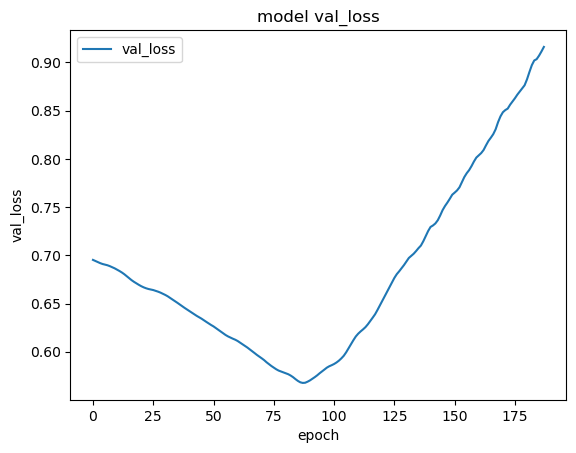

In [58]:
plt.plot(history.history['val_loss'])
plt.title('model val_loss')
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend(['val_loss'], loc='upper left')
plt.show()

# Exercice 4: Selection of the best nework structure on a multi-class problem

In [60]:
dataset = pd.read_csv('segment.csv')
dataset

X1   X2  X3        X4   X5        X6        X7        X8        X9  \
0     218  178   9  0.111111  0.0  0.833333  0.547722  1.111109  0.544331   
1     113  130   9  0.000000  0.0  0.277778  0.250924  0.333333  0.365148   
2     202   41   9  0.000000  0.0  0.944448  0.772202  1.111112  1.025597   
3      32  173   9  0.000000  0.0  1.722222  1.781593  9.000000  6.749488   
4      61  197   9  0.000000  0.0  1.444444  1.515353  2.611111  1.925463   
...   ...  ...  ..       ...  ...       ...       ...       ...       ...   
2305   30  102   9  0.000000  0.0  1.222222  0.118518  1.333333  0.800000   
2306  143   24   9  0.000000  0.0  1.277777  0.907406  0.888888  1.140749   
2307   80   72   9  0.000000  0.0  1.222223  1.003697  1.444444  1.167461   
2308   98  133   9  0.000000  0.0  0.555555  0.172133  0.388889  0.327731   
2309   19  147   9  0.000000  0.0  0.222222  0.074074  0.500000  0.077778   

             X10         X11         X12         X13        X14        X15  \
0      59.629630   52.444443   75.222220   51.222220 -21.555555  46.777780   
1       0.888889    0.000000    2.555556    0.111111  -2.666667   5.000000   
2     123.037040  111.888885  139.777790  117.444440 -33.444443  50.222220   
3      43.592594   39.555557   52.888890   38.333336 -12.111111  27.888890   
4      49.592594   44.222220   61.555557   43.000000 -16.111110  35.888890   
...          ...         ...         ...         ...        ...        ...   
2305   20.259260   20.333334   25.000000   15.444445   0.222222  14.222222   
2306  127.629630  117.666664  141.666670  123.555560 -29.888890  42.111110   
2307   59.000000   51.333332   74.444440   51.222220 -23.000000  46.333332   
2308    0.962963    0.000000    2.777778    0.111111  -2.888889   5.444445   
2309    4.148148    3.888889    6.666666    1.888889  -0.777778   7.555555   

            X16         X17       X18       X19  y  
0    -25.222221   75.222220  0.318996 -2.040554  6  
1     -2.333333    2.555556  1.000000 -2.123254  3  
2    -16.777779  139.777790  0.199347 -2.299918  2  
3    -15.777778   52.888890  0.266914 -1.998857  6  
4    -19.777779   61.555557  0.302925 -2.022274  6  
...         ...         ...       ...       ... ..  
2305 -14.444445   25.000000  0.381059 -1.555097  1  
2306 -12.222222  141.666670  0.169397 -2.349252  2  
2307 -23.333334   74.444440  0.314606 -2.090221  4  
2308  -2.555556    2.777778  1.000000 -2.123254  3  
2309  -6.777778    7.000000  0.713228 -1.475643  1  

[2310 rows x 20 columns]

In [63]:
dataset.y.value_counts()

6    330
3    330
2    330
7    330
1    330
4    330
5    330
Name: y, dtype: int64

In [64]:
train, test = train_test_split(dataset, test_size=0.2, random_state=4)

In [65]:
x_train = train.iloc[:,:-1]
y_train = train.y
x_test = test.iloc[:,:-1]
y_test = test.y

In [66]:
i=50
print('shape of y_train and y_yest BEFORE putting into matrix',y_train.shape,y_test.shape)
print('example for sample i = ',i,'label = ', y_train[i])
y_train=y_train-1 # modify values of target so that it is between 0 and 6 (rather than 1 to 7)
y_test=y_test-1 
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)
print('shape of y_train and y_yest AFTER putting into matrix',y_train.shape,y_test.shape)
print('example for sample i = ',i,'label vector  = ',y_train[i,:])


shape of y_train and y_yest BEFORE putting into matrix (1848,) (462,)
example for sample i =  50 label =  1
shape of y_train and y_yest AFTER putting into matrix (1848, 7) (462, 7)
example for sample i =  50 label vector  =  [0. 0. 0. 0. 1. 0. 0.]


In [67]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(19,)), # because 19 features
  tf.keras.layers.Dense(13,activation='relu'),# 1st hidden layer, 13 neurons, sigmoid activation
  tf.keras.layers.Dense(10,activation='relu'),# 2nd hidden layer, 10 neurons, relu activation
  tf.keras.layers.Dense(8,activation='relu'),# 3rd hidden layer, 8 neurons, relu activation
  tf.keras.layers.Dense(7),
  tf.keras.layers.Activation('sigmoid'), # last layer with 7 outputs
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 13)                260       
                                                                 
 dense_16 (Dense)            (None, 10)                140       
                                                                 
 dense_17 (Dense)            (None, 8)                 88        
                                                                 
 dense_18 (Dense)            (None, 7)                 63        
                                                                 
 activation_6 (Activation)   (None, 7)                 0         
                                                                 
Total params: 551 (2.15 KB)
Trainable params: 551 (2.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(), #  here we have multiple classes
              metrics=['accuracy'])
# WARNING : here we have multiple classes so the loss is not the same as before

In [69]:
# same as before we ask for early stopping
my_callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=150)

In [75]:
hist=model.fit(x_train, y_train, validation_split = 0.2, batch_size=100, epochs=400,callbacks=my_callbacks)

Epoch 1/400
15/15 [==============================] - 2s 32ms/step - loss: 26.6722 - accuracy: 0.1441 - val_loss: 18.3481 - val_accuracy: 0.1135
Epoch 2/400
15/15 [==============================] - 0s 7ms/step - loss: 14.1700 - accuracy: 0.1631 - val_loss: 9.9338 - val_accuracy: 0.1865
Epoch 3/400
15/15 [==============================] - 0s 6ms/step - loss: 7.9912 - accuracy: 0.1935 - val_loss: 6.5393 - val_accuracy: 0.2027
Epoch 4/400
15/15 [==============================] - 0s 9ms/step - loss: 5.4213 - accuracy: 0.2064 - val_loss: 4.5329 - val_accuracy: 0.1811
Epoch 5/400
15/15 [==============================] - 0s 9ms/step - loss: 3.8147 - accuracy: 0.1786 - val_loss: 3.3527 - val_accuracy: 0.1946
Epoch 6/400
15/15 [==============================] - 0s 6ms/step - loss: 2.8978 - accuracy: 0.1996 - val_loss: 2.6161 - val_accuracy: 0.2378
Epoch 7/400
15/15 [==============================] - 0s 9ms/step - loss: 2.3326 - accuracy: 0.2334 - val_loss: 2.1451 - val_accuracy: 0.2811
Epoch 8/4

In [72]:
plt.plot(hist.history['val_loss'])
plt.title('model val_loss')
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend(['val_loss'], loc='upper right')
plt.show()

KeyError: 'val_loss'

In [74]:
model.evaluate(x_test, y_test)

15/15 [==============================] - 0s 3ms/step - loss: 26.2702 - accuracy: 0.1537


[26.270233154296875, 0.15367965400218964]